# Chapter 3: Model classification III – non-linearity & chaos

Non-linearity and chaos are critical concepts in understanding complex systems, especially in fields like space engineering where systems can exhibit unpredictable behavior. This chapter explores the classification of models based on non-linearity and the onset of chaos, providing insights into how these phenomena manifest in various physical systems.


## Summary of the State of the Art in Nonlinear Dynamics
The following table is adapted from Figure 1.3.1 in Steven Strogatz's book Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering. It provides a dynamical view of the world, classifying phenomena based on the number of variables (n) involved and whether the system is linear or nonlinear. This summary highlights the progression from simple, solvable systems to complex, chaotic behaviors as dimensionality and nonlinearity increase.

























Number of Variables (n)Linear PhenomenaNonlinear Phenomenan = 1Growth, decay, or equilibrium
Examples: Exponential growth, RC circuit, Radioactive decay
Fixed points, Bifurcations, Overdamped systems, relaxational dynamicsLogistic equation for single speciesn = 2Oscillations
Examples: Linear oscillator, Civil engineering, Coupled harmonic oscillators, Elasticity, Mass and spring structures, Solid-state physics, Wave equations, RLC circuit, Electrical engineering, Molecular dynamics, Electromagnetism (Maxwell), 2-body problem (Kepler, Newton), Equilibrium statistical mechanics, Quantum mechanics (Schrodinger, Heisenberg, Dirac)Pendulum, Anharmonic oscillators, Limit cycles, Biological oscillators (neurons, heart cells), Predator-prey cycles, Nonlinear electronics (van der Pol, Josephson), Heat and diffusion, Acoustics, Viscous fluidsn ≥ 3Collective phenomena, Waves and patternsChaos, Strange attractors (Lorenz), 3-body problem (Poincaré), Chemical kinetics, Iterated maps (Feigenbaum), Fractals (Mandelbrot), Forced nonlinear oscillators (Levinson, Smale), Practical uses of chaos, Quantum chaos?, Coupled nonlinear oscillators, Lasers, nonlinear optics, Nonequilibrium statistical mechanics, Nonlinear solid-state physics (semiconductors), Josephson arrays, Heart cell synchronization, Neural networks, Immune system, Ecosystems, Economics, Nonlinear waves (shocks, solitons), Plasmas, Earthquakes, General


This table illustrates how low-dimensional linear systems are generally well-understood and solvable, while nonlinearity introduces complexity, especially in higher dimensions, leading to phenomena like chaos. For space engineering applications, understanding these classifications helps in modeling systems such as orbital dynamics (n=3 or more, potentially chaotic) or structural vibrations (often n=2, nonlinear).

## Periodicity and Onset of Chaos in the Logistic Map

Following the development in Chapter 12 of John R. Taylor's Classical Mechanics, we explore the logistic map as a simple discrete dynamical system that exhibits period doubling and the transition to chaos. The logistic map is a one-dimensional recurrence relation often used to model population growth but serves as an archetypal example of how nonlinearity can lead to chaotic behavior.
The logistic map is defined as:
$ x_{n+1} = r x_n (1 - x_n) $
where $ x_n $ is the state at iteration $ n $ (typically $ 0 < x_n < 1 $), and $ r $ is a parameter controlling the system's behavior ( $ 0 < r \leq 4 $). For space engineering contexts, this can analogize discrete-time models in control systems or resource allocation under constraints.
Fixed Points and Stability
To find fixed points (equilibria where $ x_{n+1} = x_n = x^* $):
$ x^* = r x^* (1 - x^*) $
Solving gives:
$ x^* = 0 $ or $ x^* = 1 - \frac{1}{r} $ (for $ r > 1 $)
Stability is determined by the derivative at the fixed point:
$ f'(x) = r (1 - 2x) $

For $ x^* = 0 $: stable when $ |r| < 1 $.
For $ x^* = 1 - \frac{1}{r} $: stable when $ |f'(x^*)| = |2 - r| < 1 $, i.e., $ 1 < r < 3 $.

For $ r < 1 $, the system converges to 0 (extinction). For $ 1 < r < 3 $, it converges to the nonzero fixed point.
Period Doubling and Bifurcations
As $ r $ increases beyond 3, the fixed point becomes unstable, and a period-2 cycle emerges (bifurcation). The period-2 points satisfy $ x_{n+2} = x_n $, but not period-1.
The period-2 cycle is stable for $ 3 < r < r_2 \approx 3.45 $. Further increases lead to period-4 ($ r \approx 3.45 $ to $ 3.54 $), period-8, and so on, with bifurcations accumulating at the Feigenbaum point $ r_\infty \approx 3.56995 $, beyond which chaos ensues.
The ratios of bifurcation intervals approach the Feigenbaum constant:
$ \delta \approx 4.6692 $
where the interval lengths $ \Delta r_k = r_{k+1} - r_k $ satisfy $ \frac{\Delta r_k}{\Delta r_{k+1}} \to \delta $.
Onset of Chaos
For $ r > r_\infty $, the behavior becomes chaotic: aperiodic, sensitive to initial conditions, and dense in some interval. However, there are "periodic windows" embedded in the chaotic regime (e.g., period-3 at $ r \approx 3.83 $).
To illustrate, we can use Python to simulate iterations and plot the bifurcation diagram.

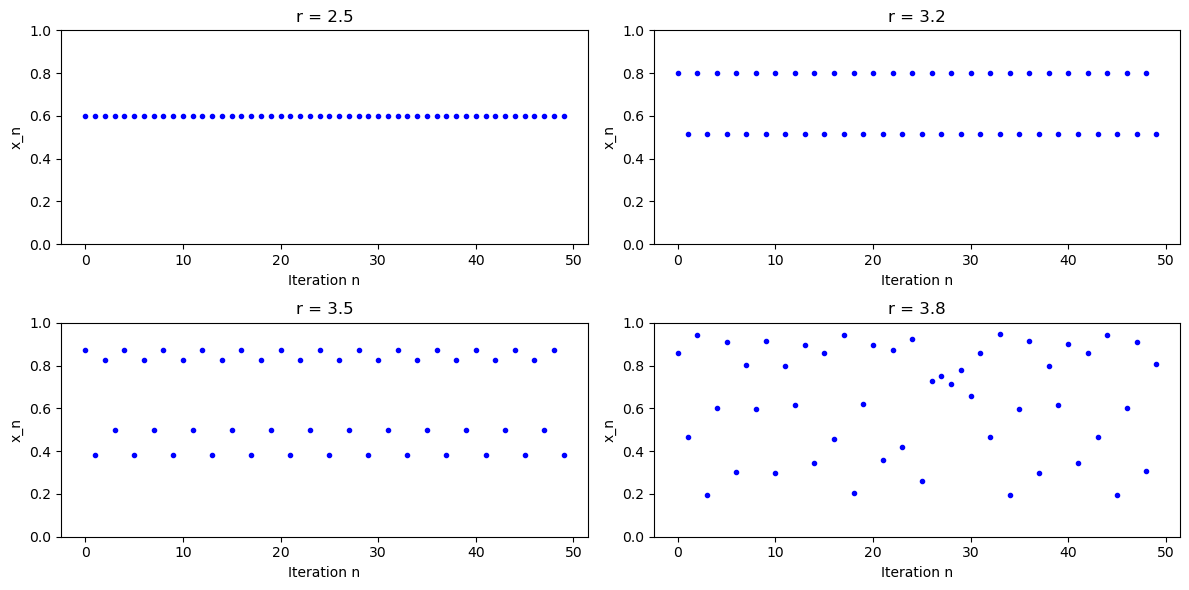

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function for logistic map iteration
def logistic_map(r, x0, n_iter=1000, n_transient=100):
    x = x0
    for _ in range(n_transient):  # Discard transient
        x = r * x * (1 - x)
    values = []
    for _ in range(n_iter):
        x = r * x * (1 - x)
        values.append(x)
    return values

# Example: Periodicity for different r
r_values = [2.5, 3.2, 3.5, 3.8]  # Fixed point, period-2, period-4, chaotic
x0 = 0.5
n_iter = 50

plt.figure(figsize=(12, 6))
for i, r in enumerate(r_values):
    plt.subplot(2, 2, i+1)
    iterations = logistic_map(r, x0, n_iter, 100)
    plt.plot(range(n_iter), iterations, 'b.')
    plt.title(f'r = {r}')
    plt.xlabel('Iteration n')
    plt.ylabel('x_n')
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

This code plots the iterations for different $ r $, showing convergence to a fixed point (r=2.5), period-2 oscillation (r=3.2), period-4 (r=3.5), and chaotic behavior (r=3.8).

## Bifurcation Diagram

To visualize the onset of chaos:

ValueError: x and y must have same first dimension, but have shapes (200,) and (200000,)

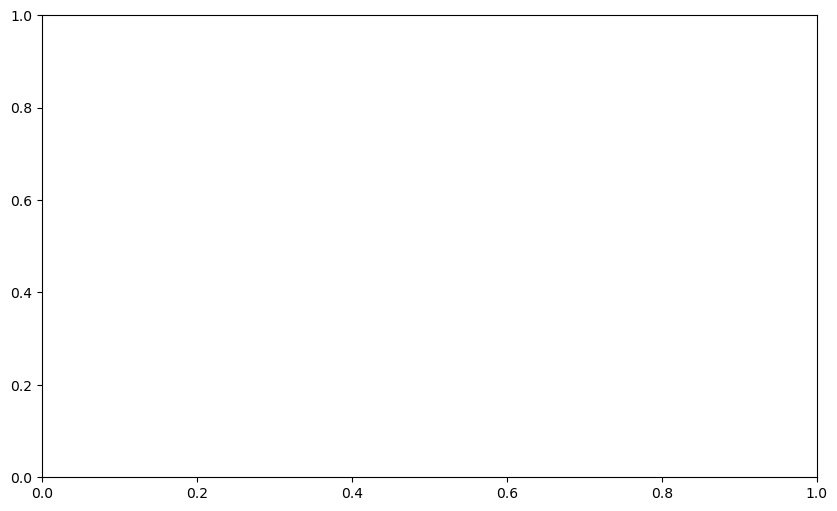

In [2]:
# Bifurcation diagram
r_min, r_max = 2.5, 4.0
n_r = 1000
n_iter = 1000
n_transient = 200
x0 = 0.00001  # Small initial value

r_vals = np.linspace(r_min, r_max, n_r)
x_vals = []

for r in r_vals:
    x = logistic_map(r, x0, n_iter, n_transient)
    x_vals.extend(x[-200:])  # Last 200 points to show attractors
    r_plot = np.repeat(r, 200)

plt.figure(figsize=(10, 6))
plt.plot(r_plot, x_vals, 'k,', alpha=0.1)  # Dense plot
plt.xlabel('r')
plt.ylabel('x (attractor values)')
plt.title('Bifurcation Diagram of the Logistic Map')
plt.show()

This diagram shows the period-doubling cascade leading to chaos around r ≈ 3.57, with periodic windows beyond.
Continuum Mechanics as Infinite DOF
Continuum mechanics treats systems like fluids or solids as having infinite degrees of freedom (DOF), described by partial differential equations (PDEs). For example, the 1D heat equation $ \frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2} $ requires discretization (e.g., finite differences) to reduce to finite DOF for numerical solution, connecting back to the finite-DOF classifications above. In space engineering, this applies to thermal modeling of spacecraft or structural analysis, where nonlinearity can introduce chaos in discretized models.
For further reading: Strogatz (full book) for dynamics classification; Taylor Ch. 12 for detailed logistic map analysis.

SyntaxError: invalid character '≈' (U+2248) (2706512415.py, line 1)